# K-Means Clustering with Seeds Data

In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler

import seaborn as sns

### 1. Import the data

In [2]:
seeds = pd.read_csv("./data/seeds.csv")

In [3]:
# A:Data anlready loaded to the DataFrame
seeds.head()

,area,perimeter,compactness,length,width,asymmetry_coeff,groove_length,species
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


### 2. Do some EDA of relationships between features.

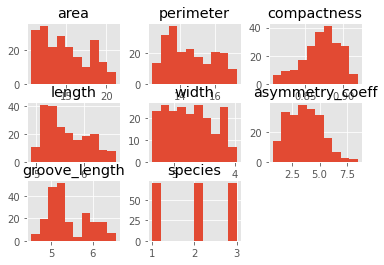

In [4]:
# Plot the Data to see the distributions/relationships
seeds.hist();

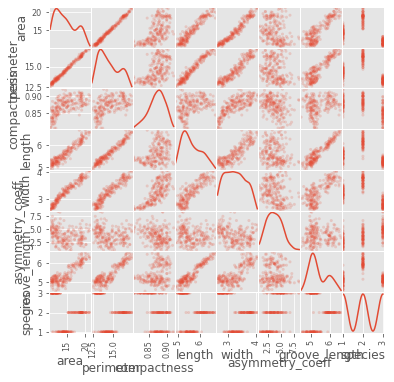

In [5]:
scatter_matrix(seeds, alpha=0.2, figsize=(6, 6), diagonal='kde');

In [6]:
# Check for nulls
seeds.isnull().sum().sort_values(ascending=False).head()

area           0
perimeter      0
compactness    0
length         0
width          0
dtype: int64

In [7]:
# Look at the real species labels.
seeds['species'].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int64)

Remember, clustering is a unsupervised learning method so known classes will never be a thing.  In this situation we can see that the `perimiter` vs. `groove_length` is a good visualization to view the proper classes class, and we can use later to compare the results of clustering to a true value.

### 3. Prepare the data for clustering

1. Remove the `species` column. We will see if the clusters from K-Means end up like the actual species.
2. Put the features on the same scale.

In [8]:
seeds.drop(columns=['species'])

,area,perimeter,compactness,length,width,asymmetry_coeff,groove_length
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


In [9]:
# Put the features on the same scale. 
X = seeds.loc[:, ['perimeter', 'groove_length']]
sc = StandardScaler()
X_sc = sc.fit_transform(X)

### 4. Clustering with K-Means

- Cluster the data to our our target groups.
- We know that there are 3 actual classes. However, in an actual situation in which we used clustering we would have no idea. Lets initally try using the default K for `KMeans`(8).

In [10]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=8, random_state=29)
km.fit(X_sc)

KMeans(random_state=29)

### 5. Get the labels and centroids for out first clustering model.

In [11]:
# Check centroids
km.cluster_centers_

array([[-1.15582165, -0.72278049],
       [ 1.23126777,  1.17232944],
       [-0.44846889, -0.96484363],
       [ 0.06776708, -0.35904125],
       [ 0.58734073,  0.68217926],
       [ 1.70706923,  1.83902527],
       [-1.09350666, -1.38169229],
       [-0.78591706, -0.27336993]])

In [12]:
# Labels
km.labels_

array([3, 2, 2, 2, 3, 2, 3, 2, 4, 4, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3,
       3, 0, 3, 3, 2, 2, 2, 2, 2, 3, 3, 2, 3, 3, 4, 4, 3, 2, 7, 7, 6, 4,
       3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 6, 6, 6, 6, 2, 6, 6,
       3, 3, 3, 2, 1, 4, 4, 1, 4, 4, 1, 5, 5, 4, 4, 1, 5, 5, 5, 1, 1, 5,
       5, 5, 5, 1, 1, 1, 5, 1, 5, 5, 5, 1, 4, 1, 1, 5, 1, 1, 1, 1, 5, 1,
       1, 1, 1, 1, 5, 5, 1, 5, 1, 5, 5, 1, 4, 1, 3, 1, 1, 1, 5, 4, 1, 1,
       4, 4, 4, 3, 1, 4, 4, 4, 7, 7, 7, 7, 7, 7, 0, 0, 7, 0, 7, 7, 7, 0,
       7, 0, 0, 7, 7, 7, 7, 7, 0, 7, 0, 0, 7, 7, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 7, 6, 7, 7, 0, 7, 7, 7, 0, 0, 6, 0, 0, 0, 0, 0, 2, 2, 2,
       7, 6, 0, 6, 6, 0, 0, 6, 0, 2, 0, 0])

### 6. Compute the silouette score and visually examine the results of the 8 clusters. 

_(pairplot with hue)_

In [13]:
from sklearn.metrics import silhouette_score

silhouette_score(X_sc, km.labels_)

0.41520256408823775

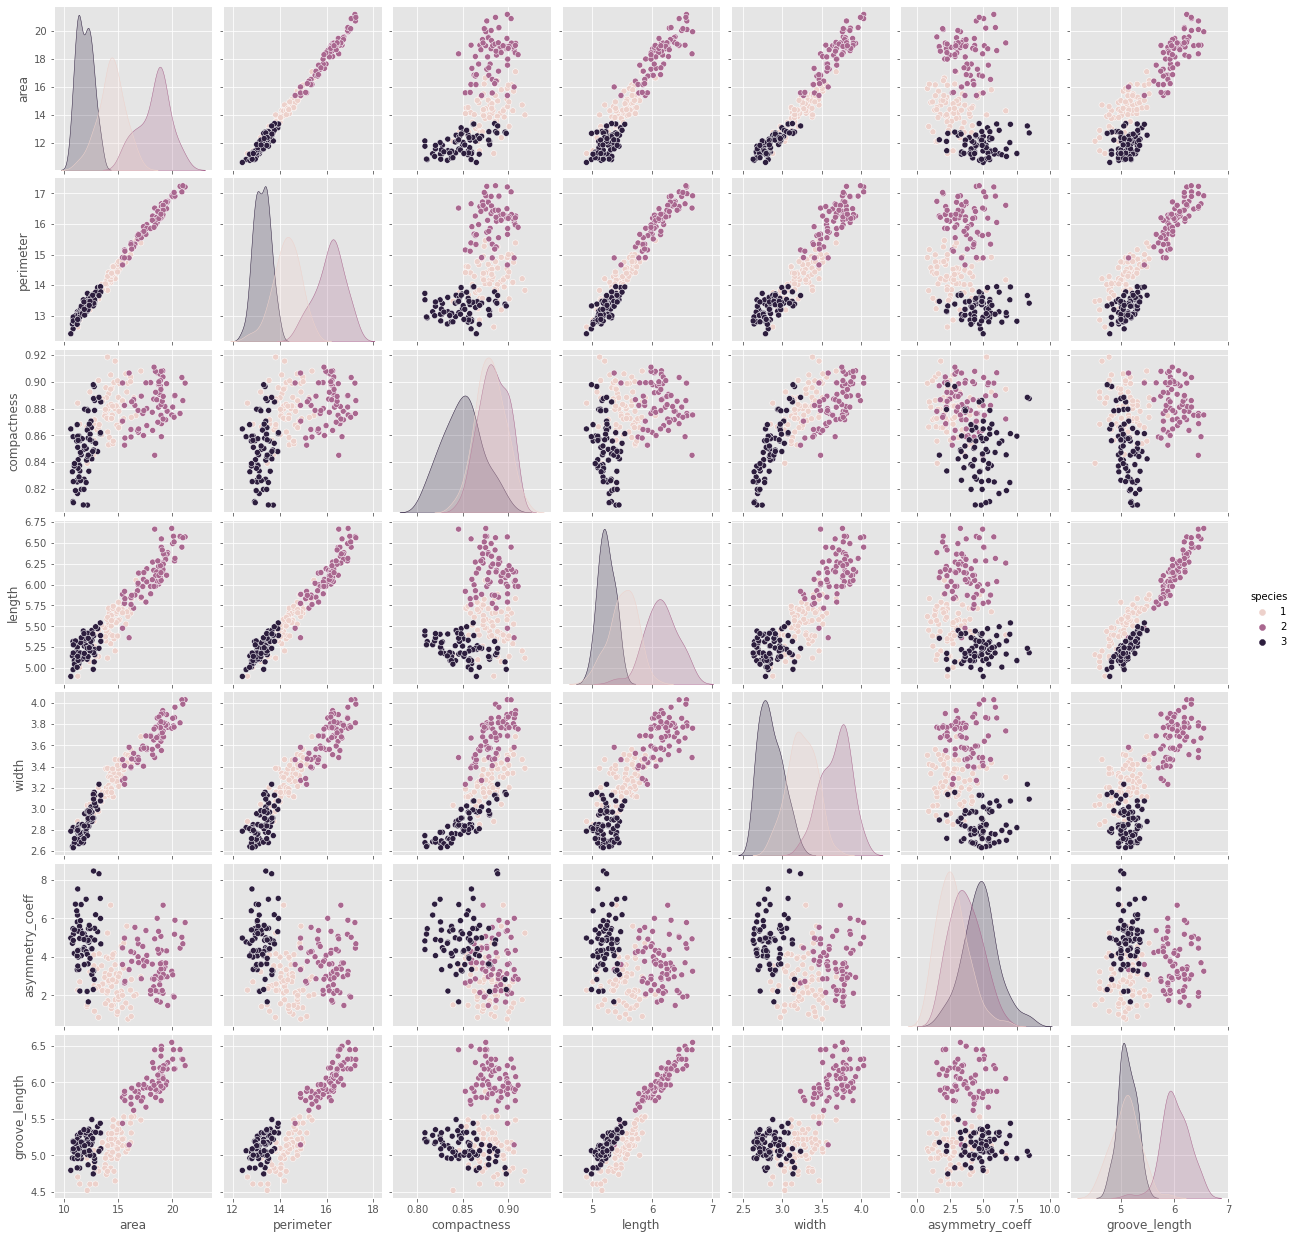

In [14]:
sns.pairplot(seeds, hue="species");

### 7. Repeat steps #4 and #6 with two selected or random K values and compare the results to the k=8 model.

In [15]:
import random

random.randint(1,25), random.randint(1,25)

(2, 1)

In [16]:
km = KMeans(n_clusters=3, random_state=29)
km.fit(X_sc)

KMeans(n_clusters=3, random_state=29)

In [17]:
# Check centroids
km.cluster_centers_

array([[ 1.29626972,  1.33539628],
       [-0.88738256, -0.77822658],
       [ 0.08337976, -0.1916491 ]])

### 8. Build a function to find the optimal number of clusters using silhouette score as the criteria.
1. Function should accept a range and a dataframe as arguments
2. Returns the optimal K value, associate silhoutte and scaling method.
3. Your function should also consider the scaled results of the data. 
    - `normalize`, `StandardScaler`, `MinMaxScaler`


Once you have found the optimal K and version of the data, visualize the clusters.





In [18]:
# Function to find the maximum score of 
def max_score(df):
    scores = []
    for k in range(10, 50): # K means to be greater than 1 to have meaning
        X = df.loc[:, ['perimeter', 'groove_length']]
        sc = StandardScaler()
        X_sc = sc.fit_transform(X)
        random.randint(1,5), random.randint(1,20)
        km = KMeans(n_clusters=3, random_state=29)
        km.fit(X_sc)
        cl = KMeans(n_clusters=k)
        cl.fit(X_sc)
        inertia = cl.inertia_
        sil = silhouette_score(X_sc, cl.labels_)
        scores.append([k, inertia, sil])
    return scores    

In [19]:
score_df =pd.DataFrame(max_score(seeds))
score_df.shape

(40, 3)

In [20]:
#Assign the values for inertia and silhouette
score_df.columns = ['k', 'inertia', 'silhouette']

In [21]:
# maximume value of silhouette
score_df['silhouette'].max()

0.4075277035590118

In [22]:
score_df

,k,inertia,silhouette
0,10,14.366784,0.387564
1,11,12.964224,0.385934
2,12,11.882392,0.371383
3,13,11.252630,0.359300
4,14,10.241145,0.368111
5,15,9.472153,0.383491
6,16,8.853604,0.372809
7,17,8.160817,0.377858
8,18,7.652215,0.366939
9,19,7.207314,0.367185


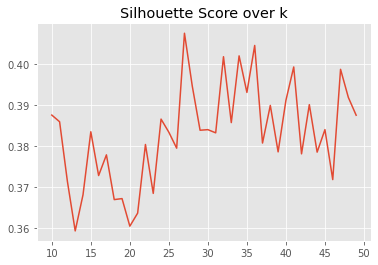

In [23]:
plt.plot(score_df.k, score_df.silhouette)
plt.title('Silhouette Score over k');

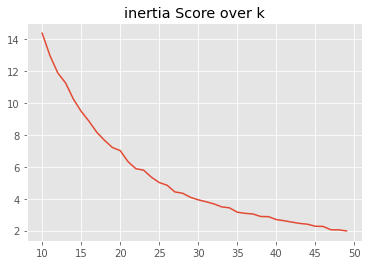

In [24]:
# silhouette score
plt.plot(score_df['k'], score_df['inertia'])
plt.title('inertia Score over k')
plt.show()

<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# DBSCAN Practice

_Authors: Joseph Nelson (DC)_

---

You're now familiar with how DBSCAN works. Let's practice it in sklearn.

We will start out working with the [NHL data](https://github.com/josephnelson93/GA-DSI/blob/master/NHL_Data_GA.csv). We're going to investigate clustering teams based on their counting stats.

[Check out this glossary of hockey terms for a reference of what the columns indicate.](http://stats.hockeyanalysis.com/glossary.php)

In [25]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### 1.  Load our data and perform any basic cleaning and/or EDA.


In [26]:
nhl = pd.read_csv('./data/nhl.csv')

In [27]:
nhl.head()

,Team,PTS,Rank,TOI,GF,GA,GF60,GA60,GF%,SF,...,FF%,CF,CA,CF60,CA60,CF%,Sh%,Sv%,PDO,PIM
0,Washington10,121,1,2001:52:00,115,73,3.45,2.19,61.2,1112,...,51.3,2138,1935,64.1,58.0,52.5,10.34,93.03,1034,1269
1,Vancouver11,117,1,2056:14:00,94,72,2.74,2.10,56.6,1143,...,53.1,2144,1870,62.6,54.6,53.4,8.22,93.16,1014,985
2,San Jose10,113,1,1929:54:00,90,68,2.80,2.11,57.0,1065,...,50.9,1985,1876,61.7,58.3,51.4,8.45,93.46,1019,1195
3,Chicago10,112,1,2020:23:00,104,83,3.09,2.46,55.6,1186,...,58.1,2093,1572,62.2,46.7,57.1,8.77,90.44,992,966
4,Vancouver12,111,1,2052:02:00,86,74,2.51,2.16,53.8,1078,...,51.0,2085,1880,61.0,55.0,52.6,7.98,93.36,1013,1049


In [28]:
x = nhl.drop(['Team', 'Rank', 'TOI'], axis=1)
y = nhl['Rank']

### 3. Scatter plot EDA

Make two scatter plots. At least one axis in one of the plots should represent points (goals for, GA). Do we obtain a general idea from the scatter plots of how many clusters we should expect to extract with a clustering algorithm?

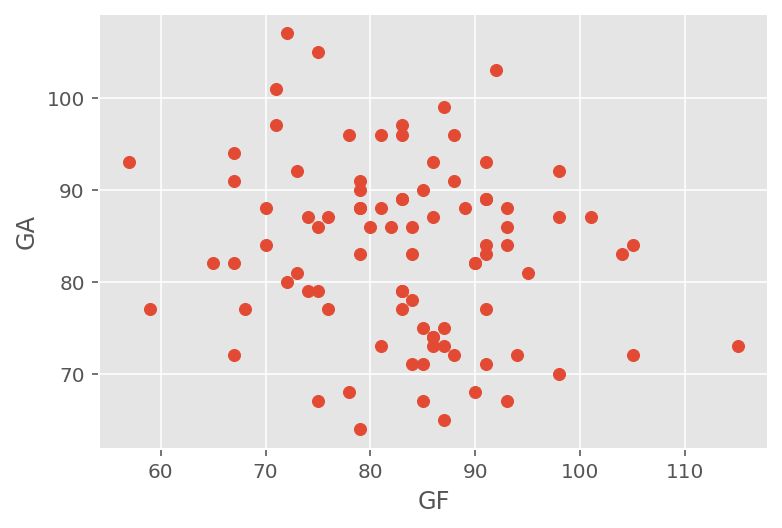

In [29]:
x1 = x['GF']
x2 = x['GA']
plt.scatter(x1,x2)
plt.xlabel("GF")
plt.ylabel("GA")
plt.show()

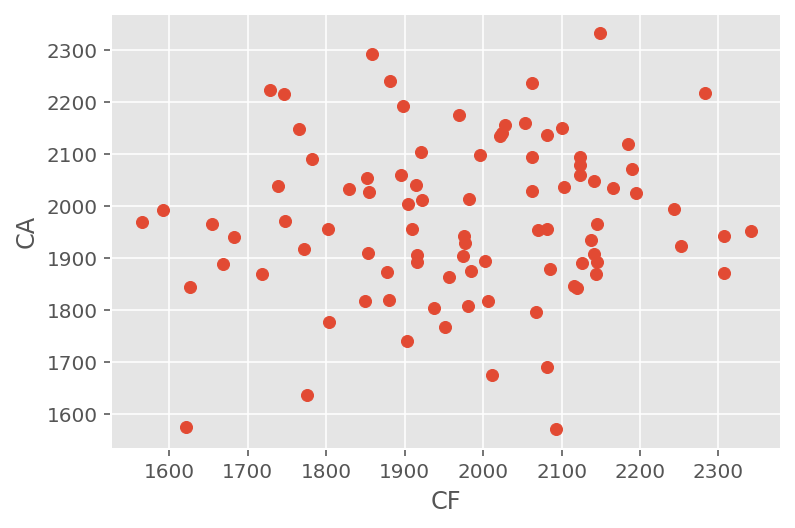

In [30]:
x1 = x['CF']
x2 = x['CA']
plt.scatter(x1,x2)
plt.xlabel("CF")
plt.ylabel("CA")
plt.show()

## 4. Scale our data

Standardize the data and compare at least one of the scatterplots for the scaled data to unscaled above.

In [31]:
nhl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Team    90 non-null     object 
 1   PTS     90 non-null     int64  
 2   Rank    90 non-null     int64  
 3   TOI     90 non-null     object 
 4   GF      90 non-null     int64  
 5   GA      90 non-null     int64  
 6   GF60    90 non-null     float64
 7   GA60    90 non-null     float64
 8   GF%     90 non-null     float64
 9   SF      90 non-null     int64  
 10  SA      90 non-null     int64  
 11  SF60    90 non-null     float64
 12  SA60    90 non-null     float64
 13  SF%     90 non-null     float64
 14  FF      90 non-null     int64  
 15  FA      90 non-null     int64  
 16  FF60    90 non-null     float64
 17  FA60    90 non-null     float64
 18  FF%     90 non-null     float64
 19  CF      90 non-null     int64  
 20  CA      90 non-null     int64  
 21  CF60    90 non-null     float64
 22  CA60

In [32]:
x11=nhl.select_dtypes(['int64', 'float'])

In [33]:
# To secreen out the string column
x11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PTS     90 non-null     int64  
 1   Rank    90 non-null     int64  
 2   GF      90 non-null     int64  
 3   GA      90 non-null     int64  
 4   GF60    90 non-null     float64
 5   GA60    90 non-null     float64
 6   GF%     90 non-null     float64
 7   SF      90 non-null     int64  
 8   SA      90 non-null     int64  
 9   SF60    90 non-null     float64
 10  SA60    90 non-null     float64
 11  SF%     90 non-null     float64
 12  FF      90 non-null     int64  
 13  FA      90 non-null     int64  
 14  FF60    90 non-null     float64
 15  FA60    90 non-null     float64
 16  FF%     90 non-null     float64
 17  CF      90 non-null     int64  
 18  CA      90 non-null     int64  
 19  CF60    90 non-null     float64
 20  CA60    90 non-null     float64
 21  CF%     90 non-null     float64
 22  Sh% 

In [34]:
X_scaled = StandardScaler().fit_transform(x11)

In [35]:
dbscan = DBSCAN()
dbscan.fit(X_scaled);

In [36]:
# assign a cluster to creat the graph
x11['GA'] = dbscan.labels_

<ipython-input-36-4d15484c1525>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x11['GA'] = dbscan.labels_


In [37]:
x4=pd.DataFrame(x11)
df3= x11[["GF", "GA", "FA"]]

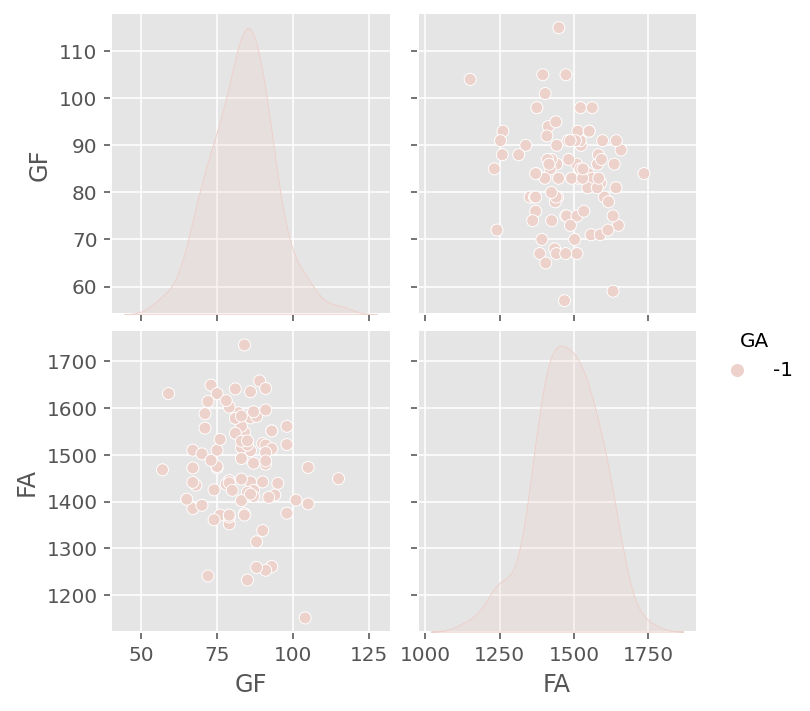

In [38]:
sns.pairplot(df3, hue='GA')

### 5. Fit a DBSCAN clusterer

Remember to pass an `eps` and `min_samples` of your choice.

In [39]:
dbscan = DBSCAN(eps=2.5, min_samples=3)
dbscan.fit(X_scaled)
set(dbscan.labels_)

{-1, 0, 1, 2, 3}

### 6. Check out the assigned cluster labels

Using the `.labels_` command on our DBSCAN class

In [40]:
# Create cluster column
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1,  0,  0,
       -1, -1, -1, -1, -1, -1, -1,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        1, -1, -1,  2,  2, -1,  3, -1, -1, -1, -1, -1, -1, -1,  3,  3,  1,
       -1, -1, -1,  1, -1], dtype=int64)

### 7. Evaluate the DBSCAN clusters

**7.1 Check the silhouette score.**

How are the clusters?

If you're feeling adventurous, see how you can adjust our epsilon and min_points to improve this.

In [41]:
silhouette_score(X_scaled, dbscan.labels_)

-0.15837468626999235

In [42]:
# Create cluster column
x11['cluster'] = dbscan.labels_

<ipython-input-42-2bf1a0abcf88>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x11['cluster'] = dbscan.labels_


**7.2 Check the homogeneity, completeness, and V-measure against the stored rank `y`**

In [43]:
# Value counts for each cluster
nhl['GA'].value_counts()

88     6
87     5
86     5
77     5
83     4
82     4
96     4
79     4
89     4
84     4
73     4
72     4
91     3
71     3
93     3
67     3
92     2
90     2
97     2
81     2
75     2
74     2
68     2
99     1
103    1
105    1
101    1
64     1
94     1
65     1
80     1
78     1
70     1
107    1
Name: GA, dtype: int64

### 8. Plot the clusters

You can choose any two variables for the axes.

In [44]:
df3= x11[["GF", "GA", "SF"]]

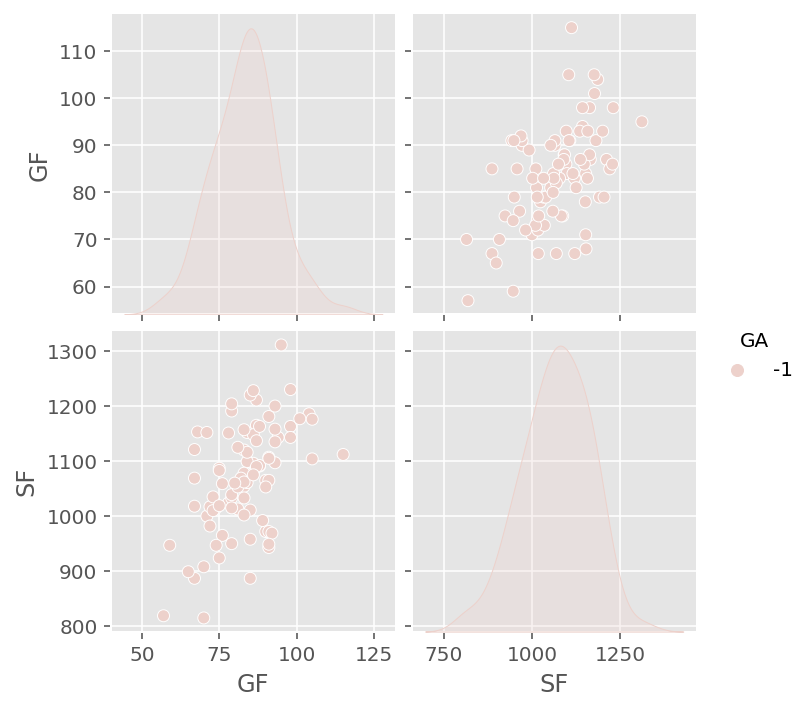

In [45]:
sns.pairplot(df3, hue='GA')

### 9. Fit DBSCAN on an easier dataset

Import the `make_circles` function from `sklearn.datasets`. You can use this to create some fake clusters that will perform well with DBSCAN.

Create some `X` and `y` using the function. Here is some sample code:
```python
from sklearn.datasets import make_circles
circles_X, circles_y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)
```

**9.1 Plot the fake circles data.**

In [46]:
from sklearn.datasets import make_circles
circles_X, circles_y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)
circles_X, circles_y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)

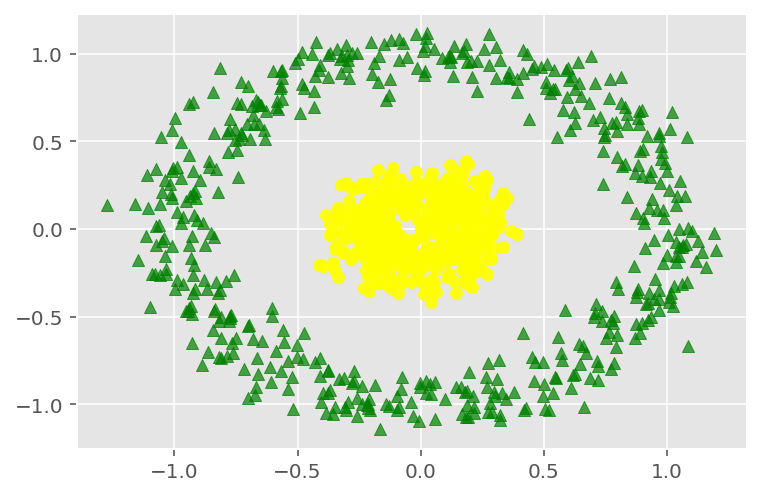

In [47]:
plt.scatter(circles_X[circles_y == 0, 0], circles_X[circles_y == 0, 1], color='green', marker='^', alpha=0.7)
plt.scatter(circles_X[circles_y == 1, 0], circles_X[circles_y == 1, 1], color='yellow', marker='o', alpha=0.9)
plt.show()

**9.2 Scale the data and fit DBSCAN on it.**

In [48]:
X = StandardScaler().fit_transform(circles_X, circles_y)

In [49]:
dbscan = DBSCAN(eps=2.5, min_samples=3)
dbscan.fit(X)

DBSCAN(eps=2.5, min_samples=3)

**9.3 Evaluate DBSCAN visually, with silhouette, and with the metrics against the true `y`.**

In [50]:
#silhouette_score(X_scaled, circles_y)